<h1 style="font-size:35px;color:deeppink;"> Data Analysis -Case Study 2</h1>

In this Case Study I took a more challenging data,that requires good amount of cleaning at my level as of now. After we will clean our data we will perform our analysis to perform Data Cleaning and reach at a conclusion

## Step 1:Asking Questions

<p style="font-size:17px;">Q1)What are features responsible for better fuel economy<br>
Q2)How much have veichles improved in fuel economy?<br>
Q3)For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?<br>
Q4)Are more models using alternative sources of fuel? By how much?<br>
Q5)What are the characteristics of SmartWay vehicles?<br></p>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2 :Data Wrangling

### Gathering Data

In [2]:
a=pd.read_csv('all_alpha_08.csv')
b=pd.read_csv('all_alpha_18.csv')

### Assessing Data

In [3]:
a.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [4]:
b.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [9]:
a.shape

(2404, 18)

In [10]:
b.shape

(1611, 18)

In [12]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
Model                   2404 non-null object
Displ                   2404 non-null float64
Cyl                     2205 non-null object
Trans                   2205 non-null object
Drive                   2311 non-null object
Fuel                    2404 non-null object
Sales Area              2404 non-null object
Stnd                    2404 non-null object
Underhood ID            2404 non-null object
Veh Class               2404 non-null object
Air Pollution Score     2404 non-null object
FE Calc Appr            2205 non-null object
City MPG                2205 non-null object
Hwy MPG                 2205 non-null object
Cmb MPG                 2205 non-null object
Unadj Cmb MPG           2205 non-null float64
Greenhouse Gas Score    2205 non-null object
SmartWay                2404 non-null object
dtypes: float64(2), object(16)
memory usage: 338.1+ KB


In [13]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
Model                   1611 non-null object
Displ                   1609 non-null float64
Cyl                     1609 non-null float64
Trans                   1611 non-null object
Drive                   1611 non-null object
Fuel                    1611 non-null object
Cert Region             1611 non-null object
Stnd                    1611 non-null object
Stnd Description        1611 non-null object
Underhood ID            1611 non-null object
Veh Class               1611 non-null object
Air Pollution Score     1611 non-null int64
City MPG                1611 non-null object
Hwy MPG                 1611 non-null object
Cmb MPG                 1611 non-null object
Greenhouse Gas Score    1611 non-null int64
SmartWay                1611 non-null object
Comb CO2                1611 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 226.6+ KB


In [14]:
a.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [15]:
b.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

In [16]:
a.describe()

,Displ,Unadj Cmb MPG
count,2404.000000,2205.000000
mean,3.748918,23.916104
std,1.335785,6.366170
min,1.300000,10.018400
25%,2.500000,19.113900
50%,3.500000,23.921300
75%,4.800000,27.869300
max,8.400000,65.777800


In [18]:
b.describe()

,Displ,Cyl,Air Pollution Score,Greenhouse Gas Score
count,1609.000000,1609.000000,1611.000000,1611.000000
mean,3.055687,5.479180,3.958411,4.711359
std,1.344574,1.749121,1.824303,1.657429
min,1.200000,3.000000,1.000000,1.000000
25%,2.000000,4.000000,3.000000,4.000000
50%,3.000000,6.000000,3.000000,5.000000
75%,3.600000,6.000000,5.000000,6.000000
max,8.000000,16.000000,10.000000,10.000000


In [19]:
a.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [20]:
b.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

In [27]:
sum(a.duplicated())

25

In [28]:
sum(b.duplicated())

0

## Cleaning Data

<h3>Dropping Columns </h3>

We will have to drop a few columns that are extra, that arent required by us,that arent present in both datasets. We will be using pandas drop function to drop them

In [32]:
a.drop(['Stnd','Unadj Cmb MPG','Underhood ID','FE Calc Appr'],axis=1,inplace=True)

In [33]:
b.drop([ 'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'],axis=1,inplace=True)

<h3>Renaming Columns</h3>

Now we will rename Sales Area columns so that all columns are same in first and second dataset.We will also add a underscore for our ease and convert all column labels to the lowercase.

In [41]:
a.rename(columns={'Sales Area':'Cert Region'},inplace=True)

In [44]:
a.rename(columns=lambda x:x.strip().lower().replace(" ","_"),inplace=True)
b.rename(columns=lambda x:x.strip().lower().replace(" ","_"),inplace=True)

In [45]:
a.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [46]:
b.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


<h4><i><p style="font-size:18px">For consistency we will compare only those with cert region as CA(California). So we will filter it out and then drop cert_region column as it would be of no use.We will also drop duplicate row and null values from both the datasets. </p></i></h4>

We can filter by two methods as shown below:

In [52]:
a=a[a['cert_region']=='CA']
b.query('cert_region=="CA"',inplace=True)

In [55]:
a.drop(columns='cert_region',axis=1,inplace=True)
b.drop(columns='cert_region',axis=1,inplace=True)


In [57]:
a.shape

(1084, 13)

In [58]:
b.shape

(798, 13)

In [61]:
a.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [63]:
b.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [64]:
a.dropna(inplace=True)

In [65]:
b.dropna(inplace=True)

In [67]:
#Just to confirm
a.isnull().sum()

model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [68]:
a.duplicated().sum()

23

In [69]:
b.duplicated().sum()

3

In [70]:
a.drop_duplicates(inplace=True)
b.drop_duplicates(inplace=True)

In [72]:
a.shape


(986, 13)

<h3> After dropping null and duplicated rows it's now time to fix the datatypes </h3>

<li style="font-size:18px;">CYL datatype</li>

In [73]:
a['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [75]:
a['cyl']=a['cyl'].str.extract('(\d+)').astype(int)

In [77]:
b['cyl']=b['cyl'].astype(int)

In [79]:
#Just to confirm
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 1 to 1609
Data columns (total 13 columns):
model                   794 non-null object
displ                   794 non-null float64
cyl                     794 non-null int64
trans                   794 non-null object
drive                   794 non-null object
fuel                    794 non-null object
veh_class               794 non-null object
air_pollution_score     794 non-null int64
city_mpg                794 non-null object
hwy_mpg                 794 non-null object
cmb_mpg                 794 non-null object
greenhouse_gas_score    794 non-null int64
smartway                794 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 86.8+ KB


<h2 style="color:red">There seems to be a problem</h2>
<p style="font-size:17px;">In this Dataset we have many values that seem to be hybrid values(more than one fuel types) i.e. Fuel is Gas/Ethanol and similarly few attributes are in this format. We need to fix it.</p>

In [84]:
#For Example
a[a['air_pollution_score']=='6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [89]:
hb_08=a[a['fuel'].str.contains('/')]

In [90]:
hb_18=b[b['fuel'].str.contains('/')]

In [91]:
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [92]:
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


In [108]:
#we will make 2 copies of it
df1_08=hb_08.copy()
df2_08=hb_08.copy()

In [109]:
#List of columns to split
split_columns=['fuel','air_pollution_score','city_mpg','hwy_mpg','cmb_mpg','greenhouse_gas_score']
#Splitting by using apply function 
for c in split_columns:
    df1_08[c]=df1_08[c].apply(lambda x:x.split('/')[0])
    df2_08[c]=df2_08[c].apply(lambda x:x.split('/')[1])

In [110]:
df1_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [111]:
df2_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


 As we can see. It has been done for 2008 data. Now it is time to repeat for 2018 data.In 2018 there is no need to split air_pollution,greenhouse_gas_score as they're in int. 

In [113]:
split_columns_2018=['fuel','city_mpg','hwy_mpg','cmb_mpg']
df1_18=hb_18.copy()
df2_18=hb_18.copy()
for c in split_columns_2018:
    df1_18[c]=df1_18[c].apply(lambda x:x.split('/')[0])
    df2_18[c]=df2_18[c].apply(lambda x:x.split('/')[1])

Now that we have successfully split the colums ,its time to drop the columns and append it with these splittes columns

In [118]:
a.drop(hb_08.index,inplace=True)
b.drop(hb_18.index,inplace=True)

In [119]:
spliited_rows_08=df1_08.append(df2_08,ignore_index=True)

In [120]:
spliited_rows_18=df1_18.append(df2_18,ignore_index=True)

In [122]:
a=a.append(spliited_rows_08,ignore_index=True)

In [123]:
b=b.append(spliited_rows_18,ignore_index=True)

In [124]:
a.shape

(987, 13)

In [125]:
b.shape

(832, 13)

In [126]:
a['air_pollution_score']=a['air_pollution_score'].astype('float')

In [127]:
b['air_pollution_score']=b['air_pollution_score'].astype('float')

In [130]:
mpg_columns = ['city_mpg','hwy_mpg','cmb_mpg']
for c in mpg_columns:
    a[c]=a[c].astype('float')
    b[c]=b[c].astype('float')

In [151]:
a['greenhouse_gas_score']=a['greenhouse_gas_score'].astype('int')

We have successfully cleaned the data. Now we will explore the data with visuals.

## Step 3: Exploratory Data Analysis

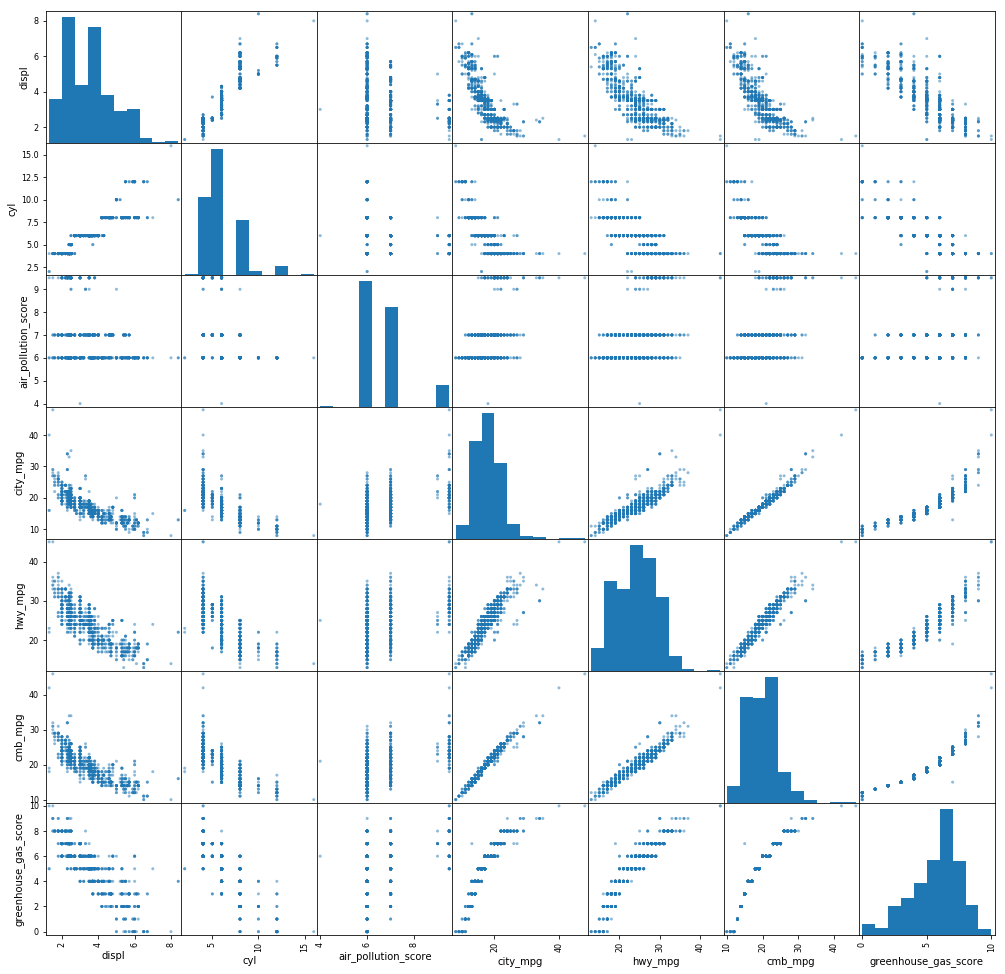

In [152]:
pd.plotting.scatter_matrix(a,figsize=(17,17));

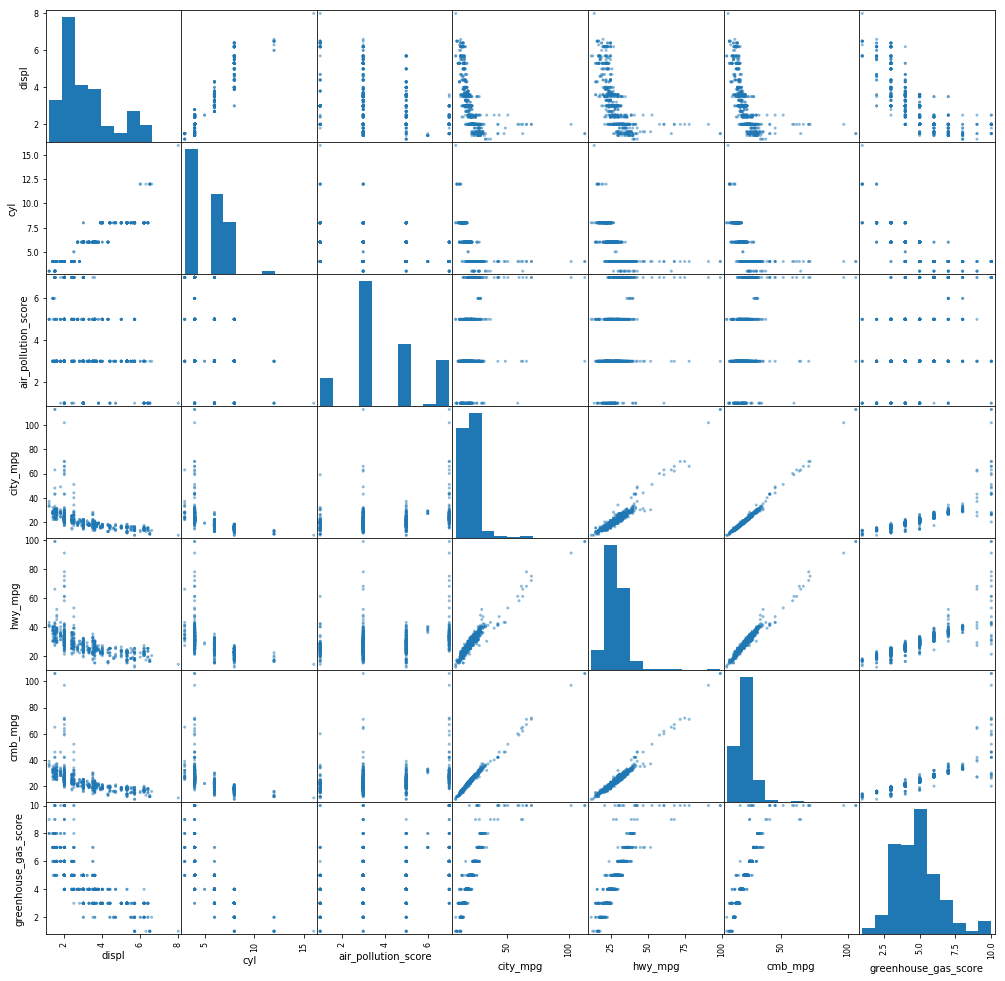

In [145]:
pd.plotting.scatter_matrix(b,figsize=(17,17));

## Step-4: Drawing Conclusions

Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?


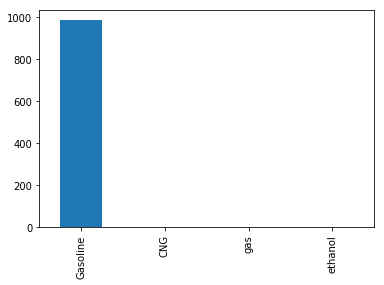

In [160]:
#2008
a.fuel.value_counts().plot(kind="bar")

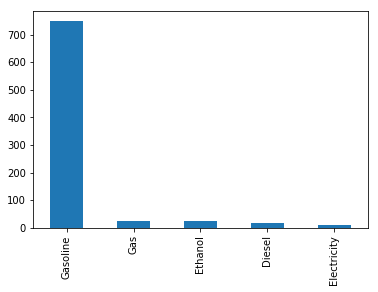

In [161]:
#2018
b.fuel.value_counts().plot(kind="bar")

Q2: How much have vehicle classes improved in fuel economy (increased in mpg)?
